In [1]:
import geopandas as gpd

## Load raw data as geodataframe
#### (India Districts and Central India OSM roads)

In [2]:
# load raw data as geodataframe
district_gdf = gpd.read_file("data/Census_2011/2011_Dist.shp").to_crs("EPSG:32643") # India districts; source: http://projects.datameet.org/maps/districts/#download
roads_gdf = gpd.read_file("data/road_data/roads_ind.shp").to_crs("EPSG:32643") # Central India Roads; source: OSM highway = motorway or trunk or primary

<AxesSubplot:>

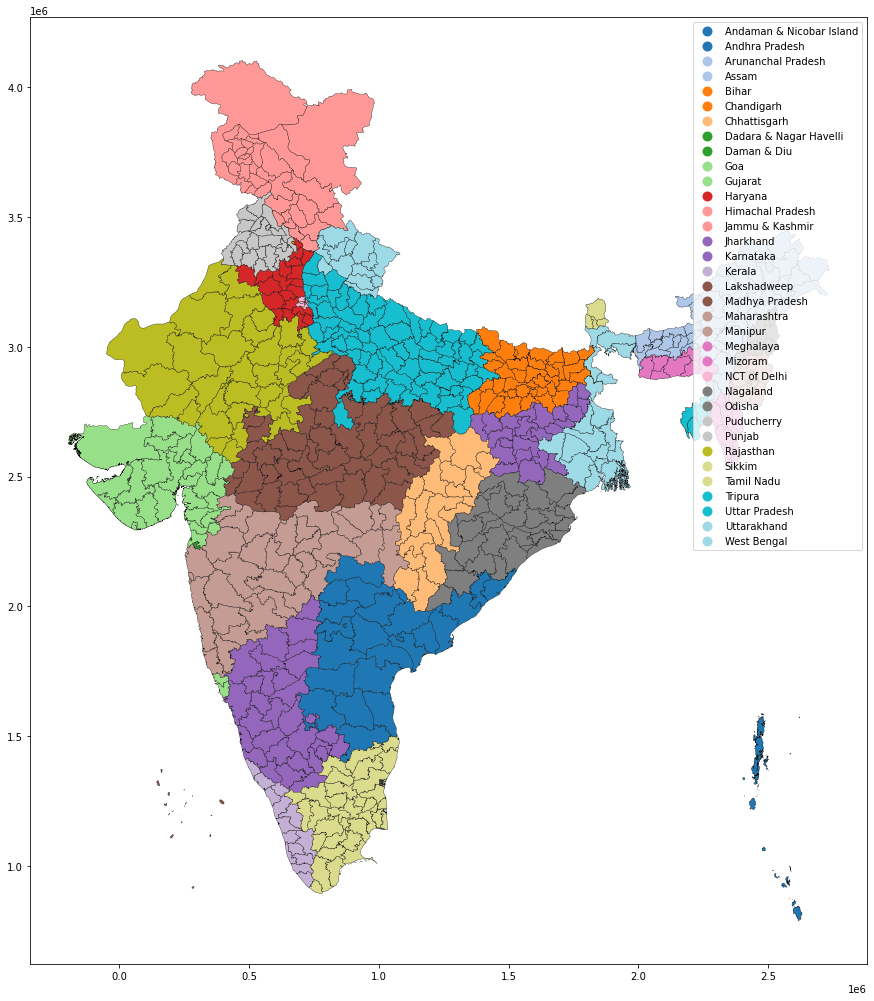

In [3]:
district_gdf.plot(column="ST_NM", figsize=(15,30), legend=True, cmap="tab20", edgecolor="black", linewidth=0.3)

<AxesSubplot:>

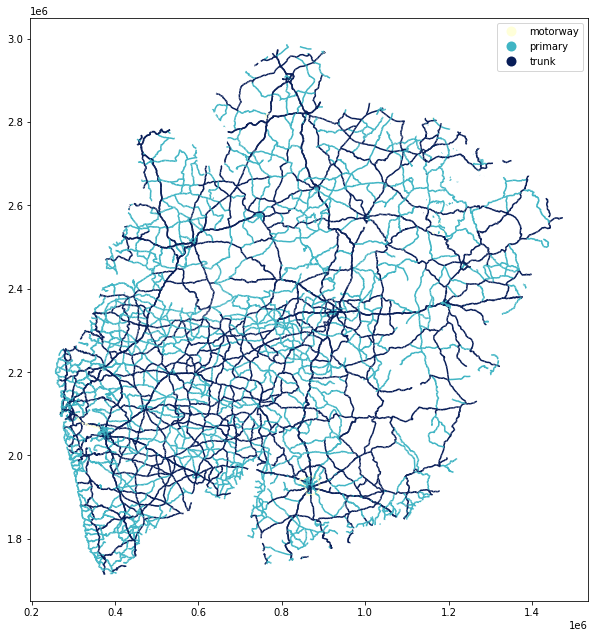

In [4]:
roads_gdf.plot(column="highway", figsize=(10,20), legend=True, cmap="YlGnBu")

## Filtering Data
#### (Districts of Maharashtra)

In [5]:
# filter Maharashtra district
mh_district = district_gdf[district_gdf["ST_NM"] == "Maharashtra"]
mh_district.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((465816.635 2205615.987, 465876.954 2..."
6,Akola,Maharashtra,27,5,501,"POLYGON ((772393.801 2297781.707, 771933.127 2..."
15,Amravati,Maharashtra,27,7,503,"POLYGON ((846042.785 2391023.981, 846607.447 2..."
29,Aurangabad,Maharashtra,27,19,515,"POLYGON ((592716.366 2274077.390, 592592.490 2..."
70,Bhandara,Maharashtra,27,10,506,"POLYGON ((1010216.020 2388212.896, 1010454.455..."


In [6]:
roads_gdf.head()

,osm_id,width,highway,layer,bridge,source,smoothness,lanes,name,surface,oneway,geometry
0,8458446.0,None,primary,None,None,None,None,None,Kalyan - Shil Road,None,yes,"LINESTRING (302751.482 2127052.054, 302745.803..."
1,8458456.0,None,primary,None,None,None,None,2,Kalyan - Shil Road,None,yes,"LINESTRING (298408.518 2120978.674, 298306.911..."
2,8458583.0,None,primary,None,None,None,None,None,None,None,no,"LINESTRING (482723.367 2131262.992, 482715.629..."
3,8458795.0,None,primary,None,None,None,None,None,None,None,no,"LINESTRING (346437.617 2109067.276, 346460.652..."
4,8459010.0,None,trunk,None,None,None,None,None,None,None,None,"LINESTRING (463009.132 2141941.753, 463061.715..."


## Performing Spatial Join (intersection of roads and districts)

In [ ]:
# spatial join of roads and district
joined = gpd.sjoin(roads_gdf, mh_district, how='inner', op='intersects')

#### (adding length of intersecting roads to joined table)

In [ ]:
# length of roads in km
joined['length'] = joined['geometry'].length/1000
joined.head()

## Calculating District Wise Road Statistics

In [ ]:
# road statistics
road_sum = joined.groupby(["DISTRICT", "highway"])["length"].sum()
print(road_sum)

In [ ]:
base_map = mh_district.plot(figsize=(12,24), color="white", edgecolor="black", linewidth=1)
joined.plot(ax=base_map, column="DISTRICT", figsize=(12,24), legend=True, cmap="viridis")

#### Total Road Length

In [ ]:
print("Total Length: ",joined["length"].sum(), "km")
print(joined.groupby(["highway"])["length"].sum())